In [2]:
import pandas
import seaborn
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipotle_data = pandas.read_csv(url, sep = '\t')

chipotle_data.head()	

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [3]:
chipotle_data.groupby('item_name')['quantity'].sum()


item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


In [4]:
chipotle_data.groupby('item_name')['quantity'].sum().idxmax()


'Chicken Bowl'

In [5]:
chipotle_data.groupby('item_name')['quantity'].sum().max()

np.int64(761)

In [6]:
total = 0 
for price in chipotle_data["item_price"].sum().split():
 total += float(price[1:])
print(total)

34500.16000000046


In [7]:
chipotle_data["quantity"].sum()

np.int64(4972)

In [8]:
chipotle_data['order_id'].nunique()

1834

In [9]:
chipotle_data["subtotal"] = chipotle_data["quantity"] *chipotle_data["item_price"].str.replace("$","").astype(float)
chipotle_data["subtotal"].sum()

np.float64(39237.02)

In [10]:
condition = chipotle_data["item_price"].str.replace("$","").astype(float)> 10 
chipotle_data[condition]["item_name"].count()

np.int64(1130)

In [11]:
pandas.unique(chipotle_data["item_name"])

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

<Axes: xlabel='item_name'>

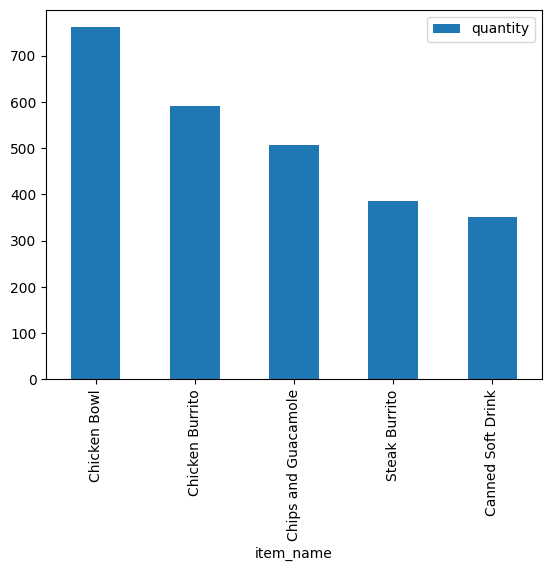

In [16]:
df = chipotle_data.groupby(chipotle_data["item_name"]).sum().sort_values("quantity", ascending=False).head(5) 
df.plot(kind = "bar", y = "quantity")

<Axes: ylabel='quantity'>

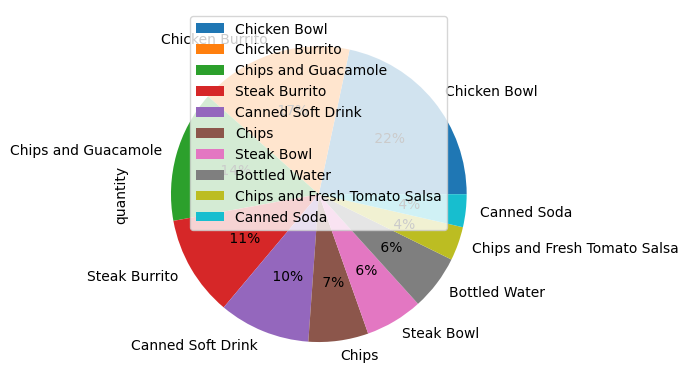

In [18]:
df = chipotle_data.groupby(chipotle_data["item_name"]).sum().sort_values("quantity", ascending=False).head(10) 
df.plot(kind = "pie", y = "quantity", autopct = "% 1.0f%%")

In [ ]:
df = chipotle_data.groupby(chipotle_data["item_name"]).sum().sort_values("quantity", ascending=False).head(10) 
t = df["quantity"] *df["item_price"].str.replace("$","").astype(float)
df.plot(kind = "line", y = t)

In [58]:
chipotle_data["Item price"] = chipotle_data["item_price"].str.replace("$","").astype(float)
item_revenue = chipotle_data.groupby("item_name")["item_price"].sum()
item_revenue = item_revenue.sort_values(ascending=False)
top_10 = item_revenue.max(10)

plt.plot(x, y)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Any suitable title")
plt.grid(True)
plt.show() 

ValueError: No axis named 10 for object type Series